In [1]:
!pip install keras

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications import Xception
#from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam as Adam

In [3]:
import tensorflow as tf
import keras.backend.tensorflow_backend as ktf


def get_session(gpu_fraction=0.9):
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction,
                                allow_growth=True)
    return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


ktf.set_session(get_session())

Using TensorFlow backend.


# import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications import Xception
#from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam as Adam

In [4]:
base_model=Xception(include_top=False, weights='../xception_weights_tf_dim_ordering_tf_kernels_notop.h5', input_shape=(224,224,3))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model= Sequential()
model.add(base_model)
# model.add(Conv2D(512, (3, 3), activation = 'relu'))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
#model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.40))
model.add(Conv2D(64, (2, 2), activation = 'relu'))
#model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.40))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 64)          16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
__________

In [5]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Dropout
# model= Sequential()
# model.add(base_model)
# model.add(Conv2D(64, (3, 3), activation = 'relu'))
# model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
# #model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.30))
# model.add(Conv2D(64, (3, 3), activation = 'relu'))
# model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.30))
# model.add(Flatten())

# model.add(Dense(1, activation='sigmoid'))


In [6]:
#model.load_weights("../../ResNet50 Weights/ResNet50final11.hdf5")

In [6]:
from tensorflow.keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=10,  
                                     zoom_range = 0.1, 
                                     width_shift_range=0.2,  height_shift_range=0.2) 

In [7]:
train_data= train_generator.flow_from_directory(
                                                batch_size=128,directory="/raid/Data/Master_Dataset/elvin/final_mix/train/",
                                                shuffle=True,class_mode="binary",target_size=(224,224))

Found 948603 images belonging to 2 classes.


In [8]:
train_data.class_indices

{'fake': 0, 'real': 1}

In [10]:
type(train_generator)

keras_preprocessing.image.ImageDataGenerator

In [9]:
type(train_data)

keras_preprocessing.image.DirectoryIterator

In [10]:
test_generator=ImageDataGenerator(rescale = 1./255)

In [11]:
val_data= test_generator.flow_from_directory(
                                              directory="/raid/Data/Master_Dataset/elvin/final_mix/validation/",
                                              shuffle=True,batch_size=128, class_mode="binary",target_size=(224,224))

Found 518144 images belonging to 2 classes.


In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=.5, min_lr=0.0001)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [14]:
from tensorflow.keras.utils import multi_gpu_model

In [15]:
# parallel_model = multi_gpu_model(model, gpus=3)
# parallel_model.compile(loss='binary_crossentropy',
#                            optimizer=Adam(lr=0.001),metrics=["accuracy"])
# #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
# parallel_model.fit_generator(generator=train_data,
#                             steps_per_epoch=train_data.samples//train_data.batch_size,
#                             validation_data=val_data,
#                             verbose=1,
#                             validation_steps=val_data.samples//val_data.batch_size,
#                             epochs=3,callbacks=[learning_rate_reduction])

In [15]:
from matplotlib import pyplot
import sys

In [16]:
def summarize_diagnostics(history,epoch):
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.ylabel('Loss')
    pyplot.xlabel('Epochs')

    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epochs')

    pyplot.subplots_adjust(top=0.92, bottom=0.2, left=0.0, right=2.5, hspace=0.25,
                    wspace=0.25)
    pyplot.show()    


    #     pyplot.subplot(213)
    # 	pyplot.title('Classification Accuracy')
    # 	pyplot.plot(history.history['accuracy'], color='blue', label='train')
    # 	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename +'Xception'+str(epoch)+ '_plot.png')

In [17]:
import tensorflow

In [18]:
i = 0
class LossHistory( tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        global i
        self.model.save("XceptionEveryEpoch" + str(i) + ".hdf5")
        i += 1

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 64)          16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 64)          0         
___________________________

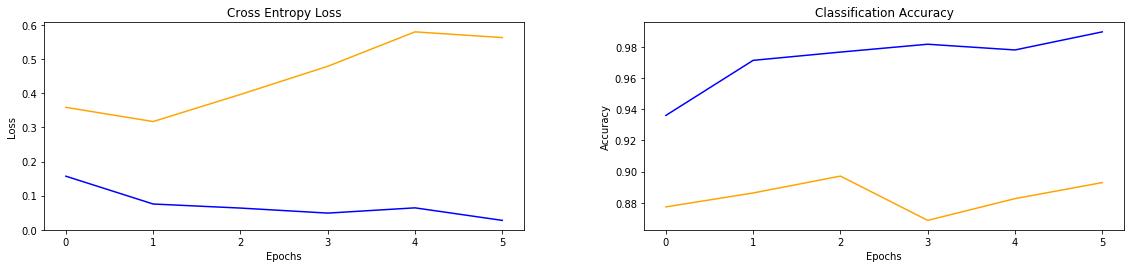

<Figure size 432x288 with 0 Axes>

In [19]:
from tensorflow.keras.utils import multi_gpu_model
#from tensorflow.keras.optimizers import SGD
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [6]:
    try:
        location="BestWeights_epoch"+str(y)+ ".hdf5"
        checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
        final_location=[]
        location=[]
        model= Sequential()
        model.add(base_model)
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))

#         model.add(Conv2D(256, (3, 3), activation = 'relu'))
#         #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#         #model.add(MaxPooling2D(pool_size = (1, 3)))
#         model.add(Flatten())
#         model.add(Dense(1024,activation='relu'))
#         model.add(Dropout(0.2))
#         model.add(Dense(512,activation='relu'))
#         model.add(Dropout(0.2))
#         model.add(Dense(1, activation='sigmoid'))

        model= Sequential()
        model.add(base_model)
        # model.add(Conv2D(512, (3, 3), activation = 'relu'))

        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Conv2D(64, (2, 2), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        #model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Flatten())
        model.add(Dense(512,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        #model.load_weights("../../ResNet50 Weights/ResNet50final11.hdf5")

    # model.add(Conv2D(512, (3, 3), activation = 'relu'))



        parallel_model = multi_gpu_model(model, gpus=2)
        #sgd = SGD(lr=0.01, decay=1e-3, momentum=0.9, nesterov=True)
        parallel_model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.001),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=parallel_model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,LossHistory(),checkpointer])

        model.save("Xception"+str(y)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['acc']
        valacc=history_model.history['val_acc']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('Xception'+str(y)+'.csv')
    except Exception as e: 
        print(e)
        continue
    


In [ ]:
from tensorflow.keras.utils import multi_gpu_model
from tensorflow.keras.models import load_model
#from tensorflow.keras.optimizers import SGD
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [4]:
    try:
        location="BestWeights_epoch"+str(y)+ ".hdf5"
        #checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
        final_location=[]
        location=[]
        model= Sequential()
        model.add(base_model)
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))

        model.add(Conv2D(256, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        #model.add(MaxPooling2D(pool_size = (1, 3)))
        model.add(Flatten())
        model.add(Dense(1024,activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(512,activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))
        model=load_weights("Xception"+str(8)+".hdf5")
#         model= Sequential()
#         model.add(base_model)
#         # model.add(Conv2D(512, (3, 3), activation = 'relu'))

#         model.add(Conv2D(512, (3, 3), activation = 'relu'))
#         #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#         model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Conv2D(64, (2, 2), activation = 'relu'))
#         #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#         #model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Flatten())
#         model.add(Dense(512,activation='relu'))
#         model.add(Dropout(0.4))
#         model.add(Dense(1, activation='sigmoid'))
        #model.load_weights("../../ResNet50 Weights/ResNet50final11.hdf5")

    # model.add(Conv2D(512, (3, 3), activation = 'relu'))



        parallel_model = multi_gpu_model(model, gpus=2)
        #sgd = SGD(lr=0.01, decay=1e-3, momentum=0.9, nesterov=True)
        parallel_model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.0002500000118743628),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=parallel_model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,es])

        model.save("Xception"+str(12)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['acc']
        valacc=history_model.history['val_acc']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('Xception'+str(12)+'.csv')
    except Exception as e: 
        print(e)
        continue
    

Epoch 1/4
1939/1939 [==============================] - 7340s 4s/step - loss: 0.0083 - acc: 0.9971 - val_loss: 0.6649 - val_acc: 0.8992
Epoch 2/4
1939/1939 [==============================] - 7351s 4s/step - loss: 0.0071 - acc: 0.9976 - val_loss: 0.5557 - val_acc: 0.9043
Epoch 3/4
1939/1939 [==============================] - 7621s 4s/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.5180 - val_acc: 0.9022
Epoch 4/4
 767/1532 [==============>...............] - ETA: 11:58 - loss: 0.6120 - acc: 0.8880

In [19]:
from tensorflow.keras.utils import multi_gpu_model
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [6]:
    try:
        location="BestWeights_epoch"+str(y)+ ".hdf5"
        checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
        final_location=[]
        location=[]
        model= Sequential()
        model.add(base_model)
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))

        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        model.add(MaxPooling2D(pool_size = (3, 3)))
        model.add(Flatten())
        model.add(Dense(512,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
#         model.add(Dropout(0.40))
#         model.add(Conv2D(64, (3, 3), activation = 'relu'))
#         #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#         model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Flatten())
#         model.add(Dense(512,activation='relu'))
#         model.add(Dropout(0.4))
#         model.add(Dense(1, activation='sigmoid'))
        #model.load_weights("../../ResNet50 Weights/ResNet50final11.hdf5")

    # model.add(Conv2D(512, (3, 3), activation = 'relu'))



        #parallel_model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.001),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,es,checkpointer])

        model.save("MobileNet"+str(y)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['acc']
        valacc=history_model.history['val_acc']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('MobileNet'+str(y)+'.csv')
    except Exception as e: 
        print(e)
        continue

Epoch 1/6
Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node xception_1/block1_conv1/Conv2D}}]]
	 [[{{node loss_1/dense_3_loss/broadcast_weights/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/has_invalid_dims/ExpandDims_1}}]]


In [20]:
from tensorflow.keras.utils import multi_gpu_model
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [6]:
    try:
        location="BestWeights_epoch"+str(y)+ ".hdf5"
        checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
        final_location=[]
        location=[]
        model= Sequential()
        model.add(base_model)
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))

        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        #model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Flatten())
        model.add(Dense(512,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
        #model.load_weights("../../ResNet50 Weights/ResNet50final11.hdf5")

    # model.add(Conv2D(512, (3, 3), activation = 'relu'))



        #parallel_model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.001),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,es,checkpointer])

        model.save("MobileNet"+str(y)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['acc']
        valacc=history_model.history['val_acc']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('MobileNet'+str(y)+'.csv')
    except Exception as e: 
        print(e)
        continue

To call `multi_gpu_model` with `gpus=2`, we expect the following devices to be available: ['/cpu:0', '/gpu:0', '/gpu:1']. However this machine only has: ['/cpu:0', '/xla_cpu:0', '/xla_gpu:0', '/gpu:0']. Try reducing `gpus`.
